# Experiment plots and reports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
rsrn = pd.read_csv('../experiment/2021_03_29__19_43_33/metrics.csv')
rnn = pd.read_csv('../experiment/2021_03_30__12_41_58/metrics.csv')
rsrn['model'] = 'RSRN'
rnn['model'] = 'RNN'
trainval = pd.concat([rsrn, rnn])
trainval['model'] = pd.Categorical(trainval['model'])
trainval['stage'] = pd.Categorical(trainval['stage'])
train = trainval[trainval['stage'] == 'train']
val = trainval[trainval['stage'] == 'val']

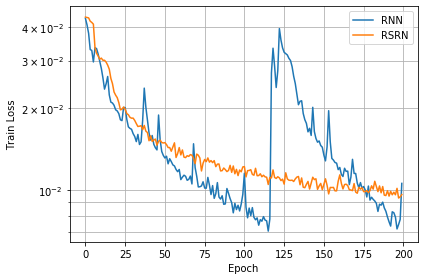

In [57]:
for model, data in train.groupby('model'):
    plt.plot(data['epoch'], data['loss'], label=model)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.yscale('log')
plt.grid(which='both')
plt.tight_layout()
plt.savefig('fig_train_loss.pdf', bbox_inches='tight')

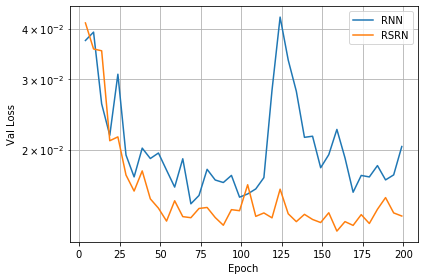

In [58]:
for model, data in val.groupby('model'):
    plt.plot(data['epoch'], data['loss'], label=model)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.grid(which='both')
plt.tight_layout()
plt.savefig('fig_val_loss.pdf', bbox_inches='tight')

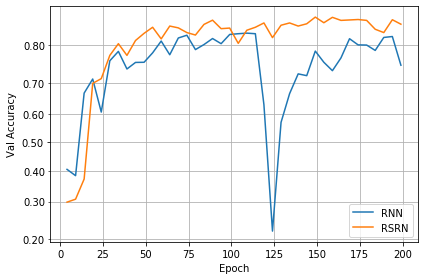

In [61]:
for model, data in val.groupby('model'):
    plt.plot(data['epoch'], data['accuracy'], label=model)
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.yscale('logit')
plt.grid(which='both')
plt.tight_layout()
plt.savefig('fig_accuracy.pdf', bbox_inches='tight')

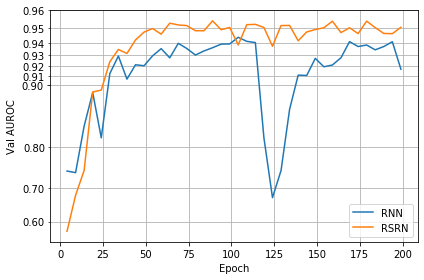

In [62]:
for model, data in val.groupby('model'):
    plt.plot(data['epoch'], data['auc'], label=model)
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Val AUROC')
plt.yscale('logit')
plt.grid(which='both')
plt.tight_layout()
plt.savefig('fig_auc.pdf', bbox_inches='tight')

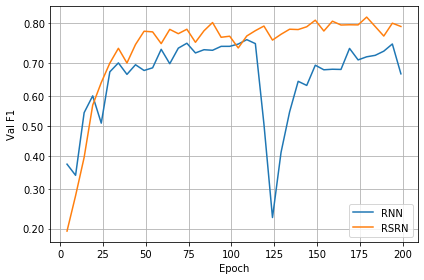

In [63]:
for model, data in val.groupby('model'):
    plt.plot(data['epoch'], data['f1'], label=model)
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Val F1')
plt.yscale('logit')
plt.grid(which='both')
plt.tight_layout()
plt.savefig('fig_f1.pdf', bbox_inches='tight')